# Regresión lineal: Historia, desarrollo y aplicación

## Introducción

Dentro del trabajo cotidiano de la estadística se encuentra el ajuste de modelos, dentro de los cuales se encuentran los modelos de regresión lineal. Estos modelos han estado más de 200 años en la labor estadística y han sido claves en la compresión de fenomenos que se explican en términos de variables relacionadas a él. 

Es innegable que desde el desarrollo de los computadores los modelos de regresión han incrementado su complejidad y nos han dado un mayor entendimiento tanto de los problemas, como de los modelos en si. Sin embargo, no se puede olvidar la historia que predece a eso, para comprender mejor el desarrollo de esos modelos, el algoritmo para estimar sus parametros, la representación de la recta (o plano) y cómo se están usando a día de hoy.

En el presente ensayo, además de tocar estos temas tambien se hará un pequeño ejemplo de aplicación; se estimará un modelo de regresión con dos variables explicativas, 1599 datos observados y se reproducirá una representación tridimensional del plano obtenido. Como una prueba de las capacidad y uso del entrenamiento de modelos de regresión en Python podremos ver la estimación de los coeficientes de regresión y una predicción de la variable de respuesta

## Historia
Para rastrear el inicio de las nociones aplicadas de regresión lineal debemos situarnos en el siglo XIX con [LambertAdolphe-Jacques Quetelet](https://es.wikipedia.org/wiki/Adolphe_Quetelet), con sus trabajos en estimación empirica de las medias y desviaciones estándar de medidas antropométricas bajo el supuesto que estas medidas dependian de variables independientes como el sexo, edad o nivel de educación. En sus estudios llegó a relacionar dos o más variables, obteniendo ecuaciones de funciones para describir el comportamiento (Estepa et al, 2012). Lo novedoso de Quetelet fue considerar la dispersión de las medidas antropométricas y dar una descripción de esa variabilidad a través de la ley normal.

Luego, el otro científico que avanzó en estos desarrollos fue [Francis Galton](https://es.wikipedia.org/wiki/Francis_Galton), cuyo principal interés en un periodo de su vida fueron los estudios empíricos de las leyes de la herencia por medio de métodos estadísticos. Galton estudia la comparación de las características físicas de los hijos con las de sus padres, esto para darle soporte a la teoría de la evolución de Darwin demostrando que las características de los sujetos se heredan de una generación a otra.

<center><img src=https://s2.studylib.es/store/data/005847580_1-7a3f90177307bab4ef7cd93e4ad59e3b.png width=200 height=100></center>

Sin embargo, según Hald (1968) Galton no tenia los suficientes datos para realizar este experimento así que diseñó uno con semillas con el fin de estudiar la distribución de los pesos de las semillas en dos generaciones. El experimento consistia en tener un grupo de 70 semillas clasificadas según su peso en siete grupos, luego darle a siete amigos 10 semillas cada uno para que sembraran las semillas y finalmente le enviaran a Galton las semillas cosechadas. Las conclusiones de este experimento fue que el peso medio de las semillas de la segunda generación era función lineal del peso de las semillas de la primera generación. Galton llamará a esta propieda **regresion** (Estepa et al, 2012).

<center><img src="doodle-gauss-portada.jpg" width=350 height=100></center>

Sin embargo, las ideas sobre regresión como hoy la conocemos se originan en [Gauss](https://es.wikipedia.org/wiki/Carl_Friedrich_Gauss) y [Legendre](https://es.wikipedia.org/wiki/Adrien-Marie_Legendre) con el método de [mínimos cuadrados](http://matematicas.uis.edu.co/sites/default/files/paginas/archivos/Minimos%20Cuadrados%20%281%29.pdf) en la primera mitad del siglo XIX. Gracias al teorema de Gauss-Markov se demuestra que los estimadores obtenidos son insesgados y no se requiere una distribución específica, es decir, el método era adecuado para estimar los parámetros (Hocking, 2003).

Finalmente, el desarrollo del computador permitió considerar modelos de regresión con cada vez más variables y análisis de varianza con más factores, permitiendo el avance de técnicas para identificar y examinar el rol de datos atípicos o detectar problemas de colinealidad.

## Planteamiento del Algoritmo

Un problema de regresión lineal es cuando tenemos una variable de respuesta **y** relacionada con k variables regresoras o explicativas **$x_{1},x_{2},\dots,x_{k}$** (Montgomery, Peck and Vining, 2001). El modelo de regresión lineal múltiple con k variables explicativas está dado por:  
$$
y = \beta_{o} + \beta_{1}x_{1} + \beta_{2}x_{2} + \dots + \beta_{k}x_{k} + \epsilon
$$

Equivalentemente de un modo matricial:
$$
y = X\beta + \epsilon
$$

Donde $y$ es el vector $n$ x 1 de observaciones, $X$ es la matriz $n$ x $k$ de los niveles de las variables regresoras, $\beta$ es el vector $k$ x 1 de coeficientes de regresión y $\epsilon$ es el vector $n$ x 1 de los errores. 
### Algoritmo para la estimación del modelo

El primer paso es calcular el producto de matrices:
$$
X'X
$$

El segundo paso es invertir el producto:
$$
(X'X)^{-1}
$$

El tercer paso es:
$$
(X'X)^{-1}X'y
$$

Por el método de mínimos cuadrados ordinarios sabemos que la estimación de los coeficientes de regresión del modelo es:

$$
\hat{\beta} = (X'X)^{-1}X'y
$$

El cuarto y último paso es la estimación del modelo:
$$
\hat{y} = X \hat{\beta} 
$$

Como un paso adicional se puede calcular el vector de residuos como:
$$
e = y - X \hat{\beta}
$$

Como ya se tiene la estimación del modelo, se debe continuar con las pruebas de significancia, la verificación del modelo y el análisis de datos atípicos. Sin embargo, esos temas no se alcanzan a abordar en este ensayo.

## Aplicación de regresión lineal

El caso aplicado será con una base de datos de vinos (Cortez et al, 2009), donde la variable de respuesta es la calidad del vino (puntaje de 0 a 10) y las variables explicativas serán acidez volátil y alcohol, a pesar de que la base de datos tiene más posibles variables explicativas con las cuales se puede construir un mejor modelo, para propósitos de este ensayo se usarán solo estas dos ya que así se podrá construir una representación en el plano tridimensional.  

Seguiremos la ayuda presentada en (Ejemplo Regresión Lineal Python | Aprende Machine Learning, 2021)

Cargamos las librerias necesarias 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Cargamos los datos de la calidad de vinos

In [3]:
#cargamos los datos de entrada
data = pd.read_csv("./winequality-red.csv")
data.shape

(1599, 12)

Vemos que se cargaron adecuádamente y vemos algunos

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Hacemos un análisis descriptivo de los datos

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Ahora, vamos a crear el modelo con dos variables explicativas que serán **volatile acidity** y **alcohol**. Esto con el fin de graficar un plano.

In [26]:
dataX2 =  pd.DataFrame()
dataX2["volatile acidity"] = data["volatile acidity"]
dataX2["alcohol"] = data["alcohol"]
XY_train = np.array(dataX2)
z_train = data["quality"]

Creamos y entrenamos el modelo

In [27]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [-1.38363571  0.31381252]
Mean squared error: 0.45
Variance score: 0.32


El modelo podria mejorar a medida que más variables son agregadas, sin embargo dejaremos estas dos para continuar con el ejemplo.

Graficamos el plano

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

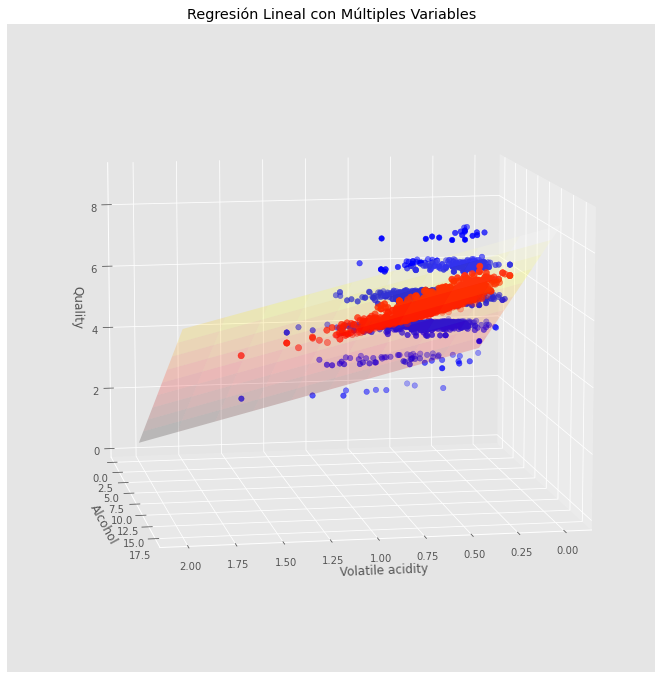

In [31]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla
xx, yy = np.meshgrid(np.linspace(0, 2, num=10), np.linspace(0, 18, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara"
ax.view_init(elev=10., azim=80)
        
ax.set_xlabel('Volatile acidity')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Quality')
ax.set_title('Regresión Lineal con Múltiples Variables')

Hacemos una predicción para un vino con acidez volátil 0.8 y alcohol 13.2

In [34]:
# Si quiero predecir: 
# según nuestro modelo, hacemos:

z_Dosmil = regr2.predict([[0.8, 13.2]])
print('la calificación es', z_Dosmil)

la calificación es [6.13088791]


## Conclusiones

* Los modelos de regresión surgieron de manera casi natural para explicar ciertas variables en terminos de otras variables, viendo en un primer momento cómo se relacionaban estas variables. Posteriormente y tras muchos años de análisis, se pueden establecer modelos lineales y los métodos adecuados para estimar los coeficientes del modelo.

* Gracias a los computadores y al desarrollo de software especializado los modelos estimados contenian cada vez más variables, más datos para estimar y un mejor entendimiento del modelo en general. Como vimos en el ejemplo desarrollado, se logró a través de Python entrenar un modelo con dos variables explicativas, 1599 observaciones y la representación del plano que resultó del modelo. Sin embargo, el conocimiento que podemos generar puede ser mucho mayor a medida que hacemos un modelo más complejo.

## Blibliografía

1. Estepa Casto, A., Gea Serrano, M., Cañadas, G. and Contreras, J., 2012. Algunas notas históricas sobre la correlación y regresión y su uso en el aula. Revista de Didáctica de las Matemáticas, 81(1), pp.5 - 14.
2. Hald, A. (1998). A history of mathematical statistics. From 1750 to 1930. New York: John Wiley
3. Hocking, R., 2003. Methods and Applications of Linear Models: Regression and the Analysis of V. 2nd ed. John Wiley & Sons, pp.3 - 4.
4. Montgomery, D., Peck, E. and Vining, G., 2001. Introduction to linear regression analysis. 5th ed. New York: Wiley, pp.67 - 72.
5. P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
6. Aprendemachinelearning.com. 2021. Ejemplo Regresión Lineal Python | Aprende Machine Learning. [online] Available at: <https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/> [Accessed 10 March 2021].